In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from pathlib import Path
import scipy.io
import py_pcha
import time
from sklearn.decomposition import NMF
import os
import warnings
import cv2
warnings.filterwarnings('ignore')

In [3]:
def load_images_from_folder(folder, color = True):
    images = []
    for filename in os.listdir(folder):
        if color == True:
            img = cv2.imread(os.path.join(folder,filename))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
        else:
            img = cv2.imread(os.path.join(folder,filename),0)
            if img is not None:
                images.append(img.flatten())
    return images


In [4]:
images = load_images_from_folder("crop_part1", True)
images = np.array(images)

In [32]:
images.shape

(9780, 40000)

In [14]:
test_images = images[:200]

In [33]:
n_components = 25

estimator = decomposition.NMF(n_components = n_components, init = 'random', tol=5e-3)    
W = estimator.fit_transform(images)


In [46]:
gray_image = images[2].reshape(200,200)

In [40]:
estimator.components_[0].shape

(40000,)

In [41]:
W[0].shape

(25,)

In [47]:
np.dot(W, estimator.components_).shape

(9780, 40000)

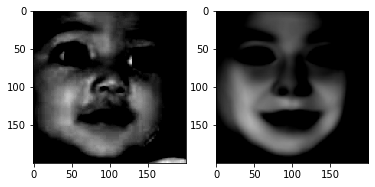

In [52]:
gray_image = images[3].reshape(200,200)
vmax = max(gray_image.max(), -gray_image.min())

fig, (ax, ax2)  =plt.subplots(ncols=2)    
ax.imshow(gray_image, cmap=plt.cm.gray, interpolation = 'nearest',vmin=-vmax,vmax=vmax)

H = estimator.components_

new_img = np.dot(W,H)[3].reshape(200,200)
ax2.imshow(new_img, cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)


In [85]:
image_shape = (10, 20, n_components)
comps = np.reshape(W,image_shape)

In [90]:
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)
inner = gridspec.GridSpecFromSubplotSpec(5, 5, subplot_spec=outer[0], wspace=0.1, hspace=0.1)

In [93]:
ax.set_title('Features extracted by NMF LS')
ax.axis('off')
fig.add_subplot(ax)
for i in range(n_components):
    comp = comps[:,:,i]
    ax = plt.Subplot(fig, inner[i])
    # normalize colormap
    vmax = max(comp.max(), -comp.min())
    ax.imshow(comp, cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

<function matplotlib.pyplot.show(close=None, block=None)>

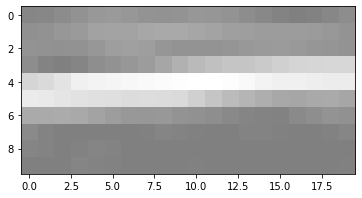

In [104]:
vmax = max(gray_image.max(), -gray_image.min())

comp = comps[:,:,0]
vmax = max(comp.max(), -comp.min())
plt.imshow(comp, cmap=plt.cm.gray, interpolation='nearest', vmin=-vmax, vmax=vmax)
plt.show

# Color images

In [5]:
images_raw = load_images_from_folder("crop_part1", True)
images_raw = np.array(images_raw)
images = images_raw
red = images[:,:,:,0].reshape(-1,200*200)
green  = images[:,:,:,1].reshape(-1,200*200)
blue = images[:,:,:,2].reshape(-1,200*200)

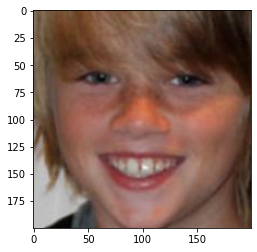

In [6]:
plt.imshow(images_raw[3400])

In [9]:
n_components = 50

estimator_red = decomposition.NMF(n_components = n_components, init = 'nndsvd', tol=5e-3)    
W_red = estimator_red.fit_transform(red)

In [10]:
n_components = 50

estimator_green = decomposition.NMF(n_components = n_components, init = 'nndsvd', tol=5e-3)    
W_green = estimator_green.fit_transform(green)

In [11]:
n_components = 50

estimator_blue = decomposition.NMF(n_components = n_components, init = 'nndsvd', tol=5e-3)    
W_blue = estimator_blue.fit_transform(blue)

In [12]:
H_red = estimator_red.components_
H_green = estimator_green.components_
H_blue = estimator_blue.components_

In [13]:
new_red = np.dot(W_red,H_red)[3400]/255
new_green = np.dot(W_green,H_green)[3400]/255
new_blue = np.dot(W_blue,H_blue)[3400]/255

In [14]:
new_red.shape

(40000,)

In [15]:
new_green

array([0.44088994, 0.4343852 , 0.42671854, ..., 0.2322    , 0.22865758,
       0.22635668])

In [16]:
new_image = np.array([new_red, new_green, new_blue])
new_image_red = np.array([new_red, np.zeros(new_red.shape), np.zeros(new_red.shape)])
new_image_green = np.array([np.zeros(new_red.shape), new_green, np.zeros(new_red.shape)])
new_image_blue = np.array([np.zeros(new_red.shape), np.zeros(new_red.shape), new_blue])
new_image = np.moveaxis(new_image, 0, -1).reshape(200,200,3)
new_image_red = np.moveaxis(new_image_red, 0, -1).reshape(200,200,3)
new_image_green = np.moveaxis(new_image_green, 0, -1).reshape(200,200,3)
new_image_blue = np.moveaxis(new_image_blue, 0, -1).reshape(200,200,3)

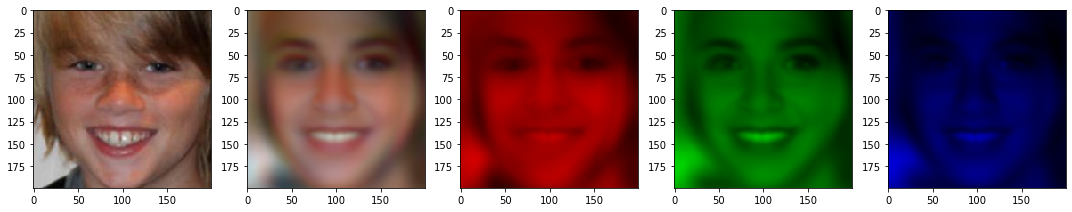

In [17]:
images_tmp = images_raw[3400]
# images_tmp[:, :, 0] = 0
# images_tmp[:, :, 1] = 0

vmax = max(images_tmp.max(), -images_tmp.min())
fig, (ax, ax2, ax3, ax4, ax5)  = plt.subplots(ncols=5)
fig.set_size_inches(18.5, 10.5)
ax.imshow(images_tmp, vmin=-vmax,vmax=vmax, interpolation='nearest')

ax2.imshow(new_image, vmin=-vmax,vmax=vmax, interpolation='nearest')
ax3.imshow(new_image_red, vmin=-vmax,vmax=vmax, interpolation='nearest')
ax4.imshow(new_image_green, vmin=-vmax,vmax=vmax, interpolation='nearest')
ax5.imshow(new_image_blue, vmin=-vmax,vmax=vmax, interpolation='nearest')
